In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [10]:
# Load dataset (adjust path if needed)
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# View actual column names
print(df.columns)

# Keep only relevant columns and rename
df = df[['v1', 'v2']]
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Map labels: ham = 0, spam = 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Display first few rows
print(df.head())


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
  label                                               text  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


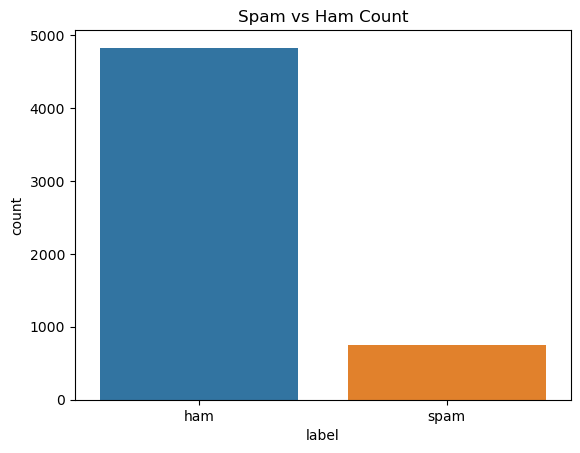

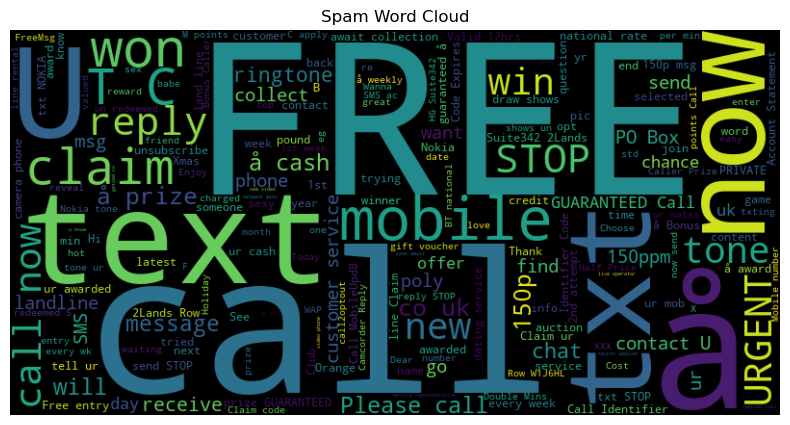

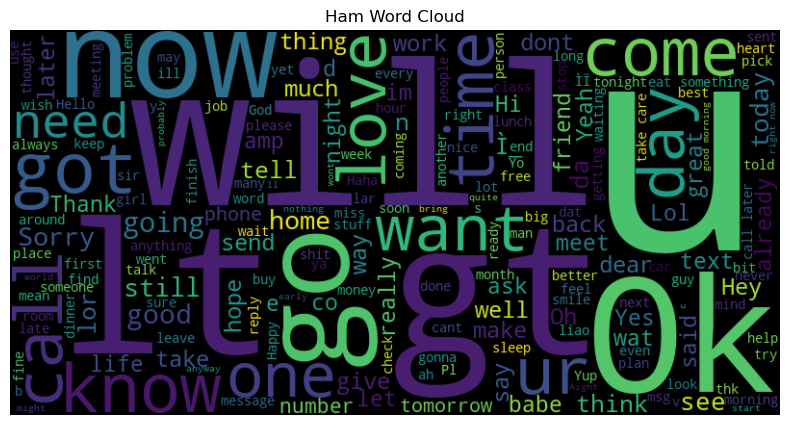

In [12]:
# Count of spam vs ham
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Count")
plt.show()

# Spam Word Cloud
spam_words = ' '.join(df[df['label'] == 'spam']['text'])
wordcloud_spam = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')
plt.show()

# Ham Word Cloud
ham_words = ' '.join(df[df['label'] == 'ham']['text'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='black').generate(ham_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Word Cloud')
plt.show()


In [13]:
# Convert text to numeric using Bag-of-Words
cv = CountVectorizer(stop_words='english')

X = cv.fit_transform(df['text'])  # Features
y = df['label_num']               # Labels

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.9802690582959641

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



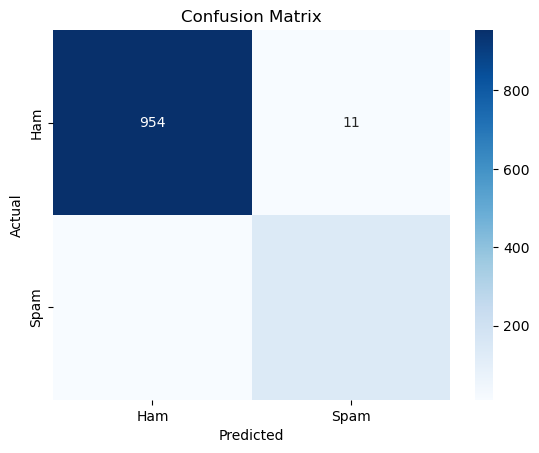

In [15]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
